In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm 
%matplotlib inline
from numpy import ma
import matplotlib as mpl

# Planteamiento teórico Poiuseuille

En el fluido laminar las trayectorias de las partículas no se cruzan. El fluido se considera como cilíndros concéntricos los cuales se deslizan unos sobre otros como tubos de telescópo. La diferencia de velocidades entre cilíndros da cuenta de la viscocidad del fluido. Consideramos Navier - Stokes

$$\rho \left(\frac{\partial}{\partial t} + u\cdot \nabla\right)u =- \nabla p + \eta\nabla^{2} u + F$$

Se considera un sistema bidimensional, de manera que $u = u_{x}\hat{x} + u_{y}\hat{y}$, en donde se asume que la velocidad solo depende de $y$, y es nula en la dirección $x$

$$\rho\frac{\partial u_{x}}{\partial t}+\left(u_{x}\frac{\partial}{\partial x} + u_{y}\frac{\partial}{\partial y}\right)u_{x} = -\frac{\partial p}{\partial x} + \eta\left(\frac{\partial^{2}}{\partial x^{2}}+\frac{\partial^{2}}{\partial y^{2}}\right)u_{x}$$

$$\rho\frac{\partial u_{y}}{\partial t}+\left(u_{x}\frac{\partial}{\partial x} + u_{y}\frac{\partial}{\partial y}\right)u_{y} = -\frac{\partial p}{\partial y} + \eta\left(\frac{\partial^{2}}{\partial x^{2}}+\frac{\partial^{2}}{\partial y^{2}}\right)u_{y}-\rho g$$

No se considera aceleración en el fluido se tiene:

$$ 0 = -\frac{\partial p}{\partial y} + \eta\frac{\partial^{2}u_{y}}{\partial x^{2}} - \rho g \longrightarrow \eta\frac{\partial^{2}u_{y}}{\partial x^{2}} =  \frac{\partial p}{\partial y} +  \rho g$$

Solucionando la ecuación diferencial se obtiene

$$u_{y} = \frac{1}{2\eta}\left(\frac{\partial p}{\partial y} + \rho g\right)x^{2} + C_{1}x +C_{2}$$

Considerando las condiciones de frontera 

$$u_{y}(x=0) =0 \qquad u_{y}(x = d) = 0$$

Se obtiene 

$$u_{y} = \frac{1}{2\eta}\left(\frac{\partial p}{\partial y} + \rho g\right)x(x-d)$$

Que se puede escribir como 

$$\boxed{u_{y} = \frac{1}{2\eta}\left(\frac{\partial p}{\partial y} + \rho g\right)\left[\left(x-\frac{d}{2}\right)^{2} - \frac{d^{2}}{4}\right]}$$



Se intenta simular un fluido real, en este caso se intenta con el agua, la cual tiene una viscocidad dinámica dada por $\mu = 0.001$ $kg/ms$, vemos los parámetros del fluido a continuación 

+ $d = 1m$
+ $\rho = 997$ $\frac{kg}{ms}$
+ $g = 9.8$ $\frac{m}{s^{2}}$
+ $\frac{\partial P}{\partial y} = 9770.5 Pa$
+ $\nu = 1\times10^{-6} \frac{m^{2}}{s}$

A continuación se muestra el perfil al cual se quiere llegar a través de la simulación 

In [290]:
def uy(x,eta,g,P):
    d = 1.
    rho = 1 # kg/m**3
    return (1/(2*eta))*(-P+rho*g)*((x-d/2.)**2 - d**2/4.)



La viscocidad cinemática está relacionada con los parámetros de simulación de acuerdo a la siguiente fórmula 

$$\eta = \rho(c^{*}_{o})^{2}\left(\tau^{*}-\frac{1}{2}\right)\frac{\Delta x^{2}}{\Delta t}$$

Esta ecuación está relacionada con los parámetros de simulación *, se ve entonces que la viscocidad del fluido en la simulación está dada por 

$$\nu = 0.001521$$

En la simulación se adoptan los siguientes parámetros $\Delta x = \Delta y = 1/256$, por lo tanto debemos calcular los parámetros físicos reales a partir de los factores para la adimensionalización del sistema y esto se calcula como sigue 

$$l = l^{*}\Delta x = 0.00390625 m$$

entonces la velocidad que se espera en el canal será, según la ley de Pouseuille

$$u_{p} = \frac{gl^{2}}{8\nu} = \frac{9.8(0.00390625)^{2}}{8(0.001521)}\frac{m}{s} = 0.0322 \frac{m}{s} $$

Entonces el número de Reynolds del sistema será 

$$Re = \frac{u_{p}l}{\nu} = 31.466 $$

-0.09747800739955245
viscocidad lattice:  0.0333333333333
gravedad:  4.03740657189e-07
Numero de Reynolds:  771.0
Paso de tiempo real:  1.5140274644582054e-05
Factor de escala de la velocidad:  257.0
Para que la simulación lleve a cabo un 1 segundos son  66048.99999999999 pasos
la velocidad teórica en unidades de lattice será 0.1


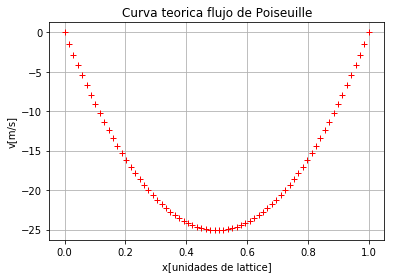

In [400]:
ll = 257.; upl = 0.1;dx = 1/ll 
cs = 1./np.sqrt(3.)
nul = (1/3.)*(0.1) 
taul = 0.6
gl = 8*nul*(taul - 0.5)/ll**2
Re = (upl*ll)/(nul)
dt = cs**2*(taul-0.5)*(dx**2)/nul
Pl = 26e-3

def uy(x,eta,g,P):
    d = 1
    rho = 1 # kg/m**3
    return (1/(2*eta))*(P-rho*g)*((x-d/2.)**2 - d**2/4.)

x = np.linspace(0,1,70)
plt.plot(x,dx*uy(x,nul,gl,Pl)/dt,"r+")
print np.min(uy(x,nul,gl,Pl))
plt.grid(True)
plt.xlabel("x[unidades de lattice]")
plt.ylabel("v[m/s]")
plt.title("Curva teorica flujo de Poiseuille")


print "viscocidad lattice: ", nul
print "gravedad: ", gl
print "Numero de Reynolds: ",Re
print "Paso de tiempo real: ",dt
print "Factor de escala de la velocidad: ", dx/dt
print "Para que la simulación lleve a cabo un 1 segundos son ",1./dt,"pasos"
print "la velocidad teórica en unidades de lattice será", gl*ll**2/(8*nul)

In [391]:
(gl*ll**2)/(8*nul) 

0.09999999999999998

In [543]:


def PoiseuilleGrafica(udat,vdat,xdat,ydat,rhodat,pasos):
    uesc = dx/dt
    u = uesc*np.transpose(np.loadtxt(udat, unpack = True))
    v = uesc*np.transpose(np.loadtxt(vdat, unpack = True))
    x = np.transpose(np.loadtxt(xdat, unpack = True))
    y = np.transpose(np.loadtxt(ydat, unpack = True))
    rho = np.transpose(np.loadtxt(rhodat, unpack = True))
    X = np.linspace(0,1,50)

    f, axarr = plt.subplots(1,2, figsize=(24,6))
    st = f.suptitle("Flujo de Pouseuille $\\tau = 0.6$", fontsize=25)
    st.set_y(1.0)

    M= np.hypot(u, v)
    axarr[0].streamplot(x,y,u,v, color="k",linewidth=0.8,density=0.4, arrowstyle='->', arrowsize=1.5)
    im=axarr[0].quiver(x, y, u,v, M , cmap=plt.cm.jet,scale = uesc ,width=10./uesc)
    axarr[0].set_title(str(pasos),fontsize = 20)
    axarr[0].set_xlim(-0.01,1)
    axarr[0].set_xlabel("$x[m]$",fontsize = 20)
    axarr[0].set_ylabel("$y[m]$",fontsize = 20)
    axarr[0].tick_params(axis="x", labelsize=20)
    axarr[0].tick_params(axis="y", labelsize=20)
    
    axarr[1].plot(x,v[128,:],"b", label = "Simulacion")
    axarr[1].plot(X,uesc*uy(X,nul,gl,Pl),"r+", label = "Teorica")
    axarr[1].set_ylim(-0.1*uesc,0)
    axarr[1].legend()
    axarr[1].grid(True)
    axarr[1].set_title('Perfil de Velocidad',fontsize = 20,y=1.0)
    axarr[1].set_xlabel("$x[m]$",fontsize = 20)
    axarr[1].set_ylabel("$v[m/s]$",fontsize =20)
    axarr[1].tick_params(axis="x", labelsize=20)
    axarr[1].tick_params(axis="y", labelsize=20)
    
    cbar = f.colorbar(im, ax=axarr, shrink = 1.0)
    cbar.set_label('$v[m/s]$',fontsize =20)
    cbar.ax.tick_params(labelsize=20)


In [544]:
uref = np.transpose(np.loadtxt("Datos/u655360.dat", unpack = True))
vref = np.transpose(np.loadtxt("Datos/v655360.dat", unpack = True))

print np.shape(u), np.shape(v),np.min(dx*v[128,:]/dt)*uesc

(257, 257) (257, 257) -2.6949383500799997


## $t = 0.1$ s

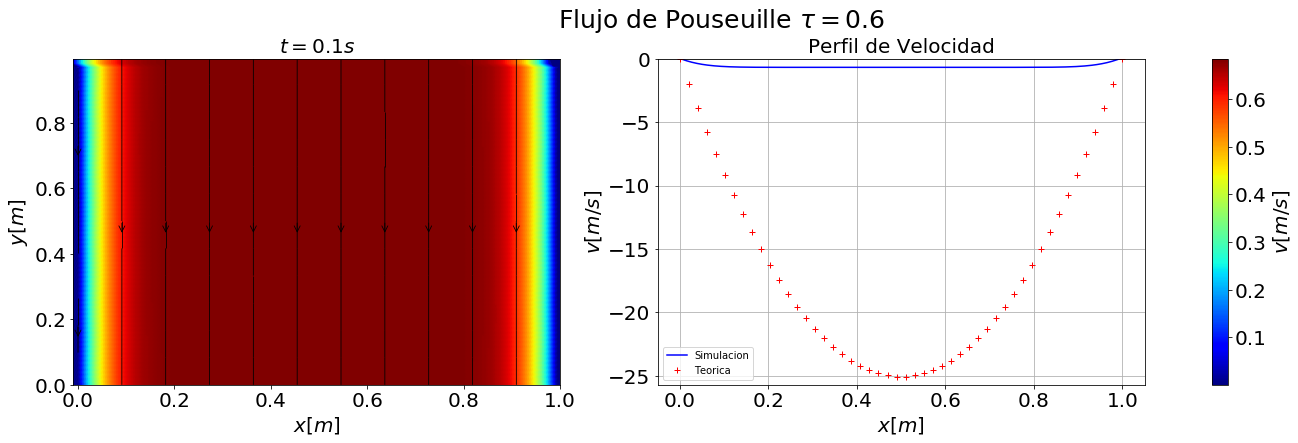

In [549]:
PoiseuilleGrafica("Datos/u6553.dat","Datos/v6553.dat","Datos/x6553.dat","Datos/y6553.dat","Datos/rho6553.dat","$t = 0.1 s$")
plt.savefig("01s")

## $t = 1$s

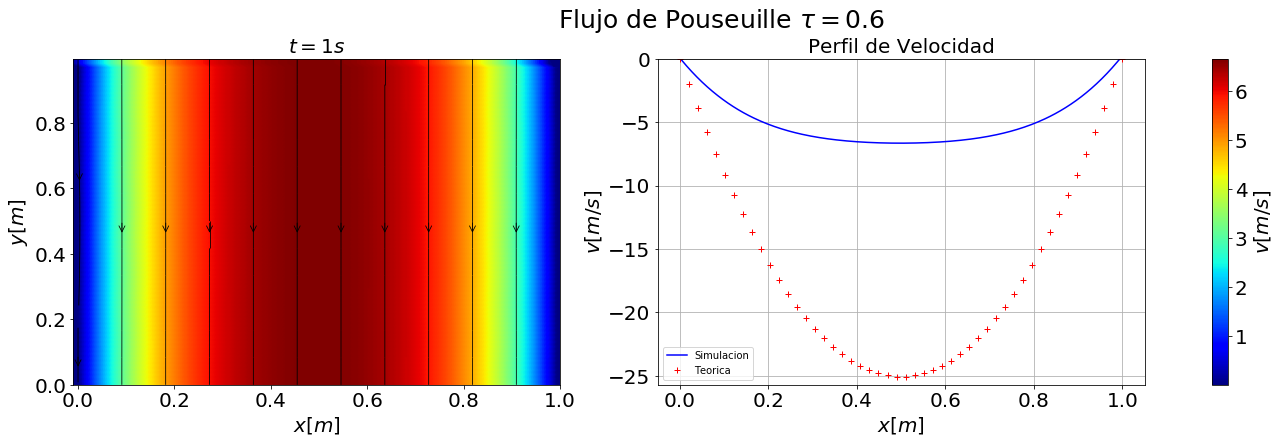

In [546]:
PoiseuilleGrafica("Datos/u65536.dat","Datos/v65536.dat","Datos/x65536.dat","Datos/y65536.dat","Datos/rho65536.dat","$t = 1 s$")
plt.savefig("1s")

## $t=5$s

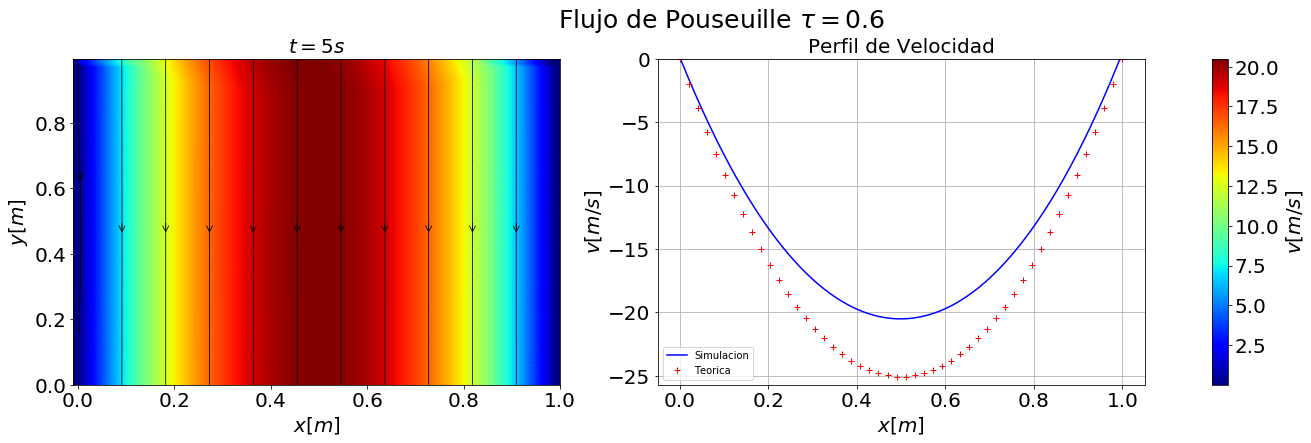

In [547]:
PoiseuilleGrafica("Datos/u327680.dat","Datos/v327680.dat","Datos/x327680.dat","Datos/y327680.dat","Datos/rho327680.dat","$t = 5 s$")
plt.savefig("5s")

## $t = 10$s

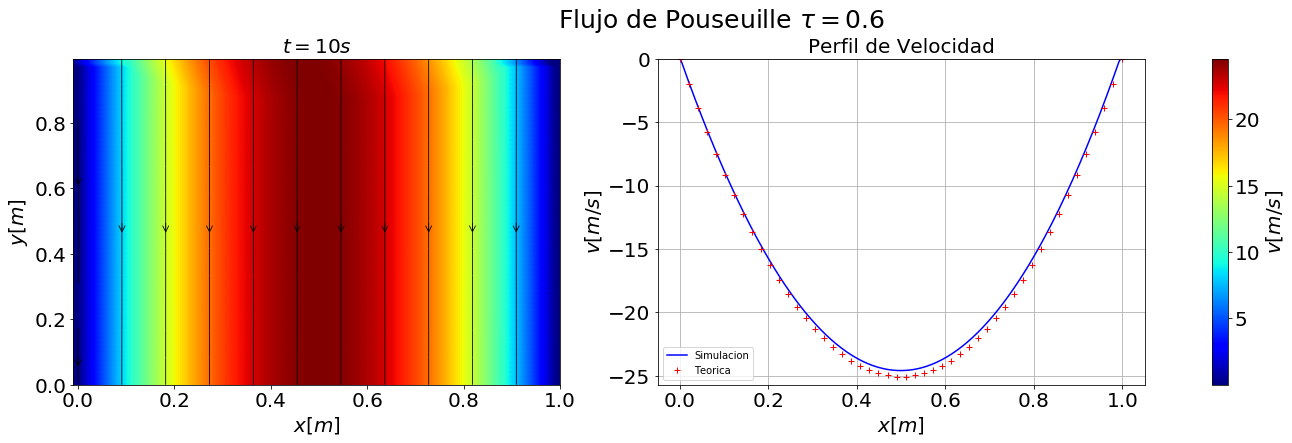

In [548]:
PoiseuilleGrafica("Datos/u655360.dat","Datos/v655360.dat","Datos/x655360.dat","Datos/y655360.dat","Datos/rho655360.dat","$t = 10 s$")
plt.savefig("10s")